In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the CSV file into a DataFrame
insurance = pd.read_csv("new_insurance_data.csv")

# Exploratory Data Analysis (EDA):

In [3]:
# Display the first few rows of the DataFrame
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
#Display the number of rows and columns in the dataset
insurance.shape

(1338, 13)

In [5]:
# Get summary statistics of numerical columns
insurance.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [6]:
# Get information about the DataFrame, also non-null values
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [7]:
# CHECK THE NUMBER OF NULL VALUES IN EACH COLUMN
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [8]:
  # Display Column names
  insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [9]:
# Extract column names and save it as a list, so that it is easier to replace null values and we can easily work with the loops
col = list(insurance.columns)
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [10]:
# Replacing numerical null values with mean and object null values with mode

for i in col:
  if insurance[i].dtypes == 'object':
    insurance[i] = insurance[i].fillna(insurance[i].mode()[0])
  else:
    insurance[i] = insurance[i].fillna(insurance[i].mean())

In [11]:
insurance.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

# VISUALISATION

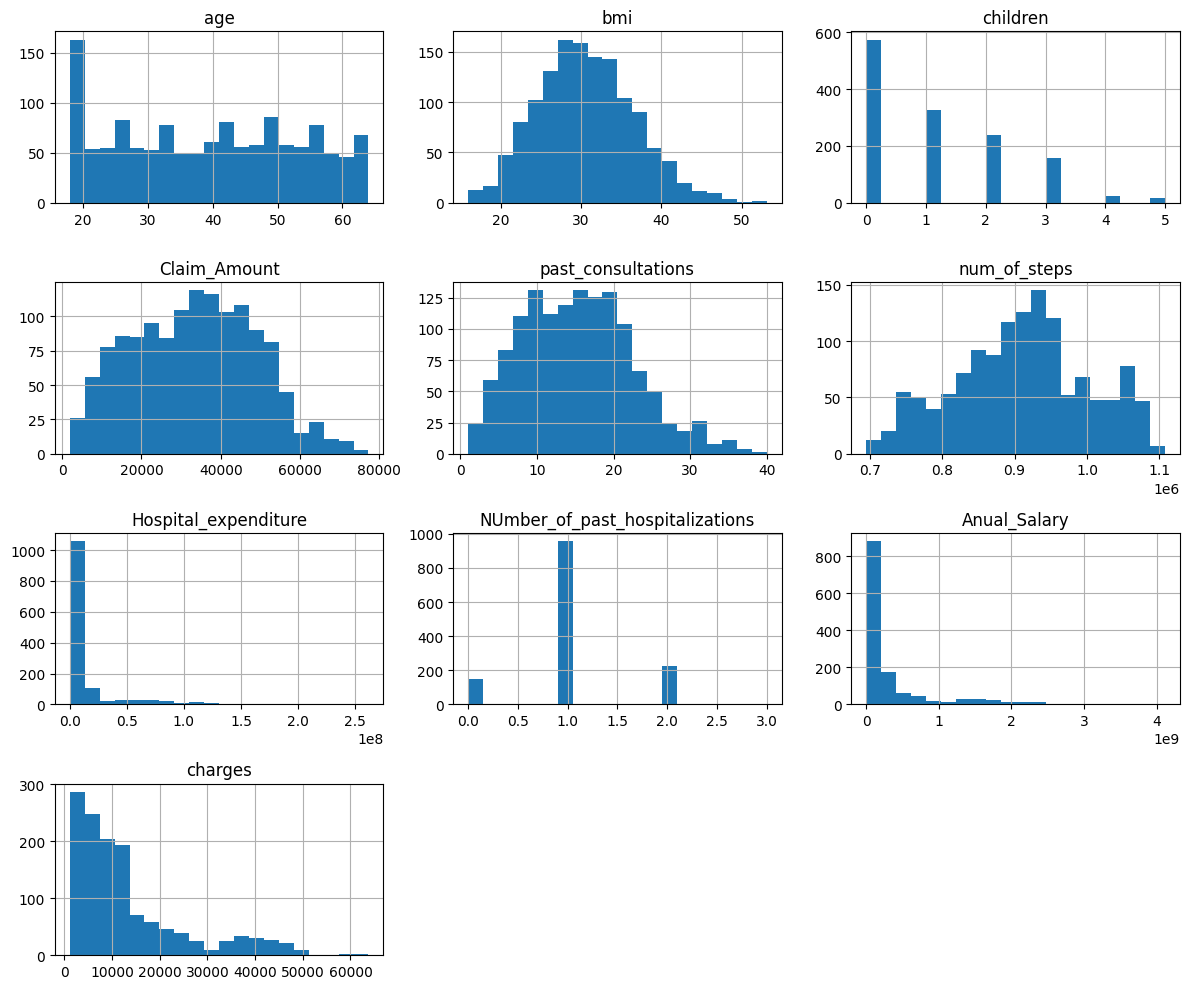

In [12]:
# Select only the numerical columns
numerical_columns = insurance.select_dtypes(include=['int64', 'float64'])

# Create histograms for all numerical columns
numerical_columns.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

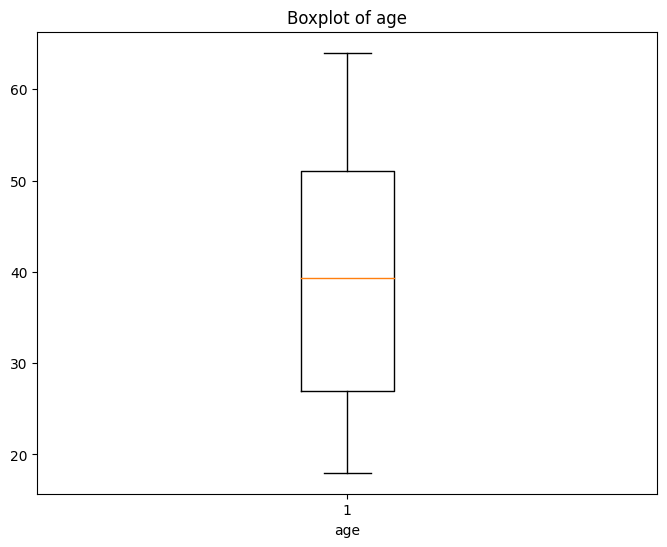

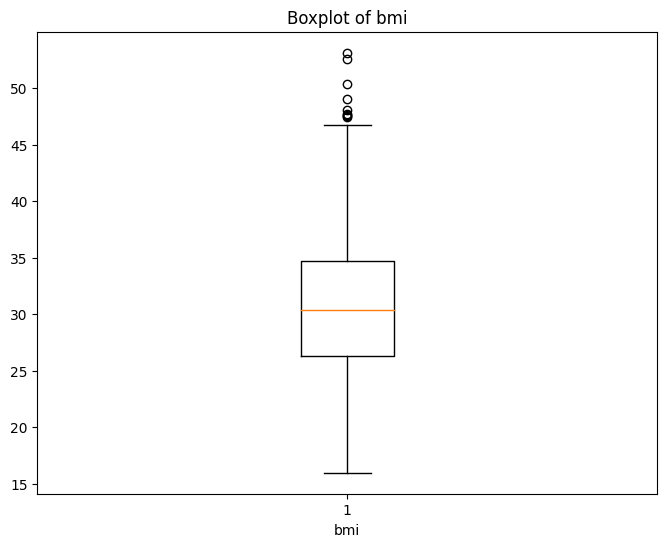

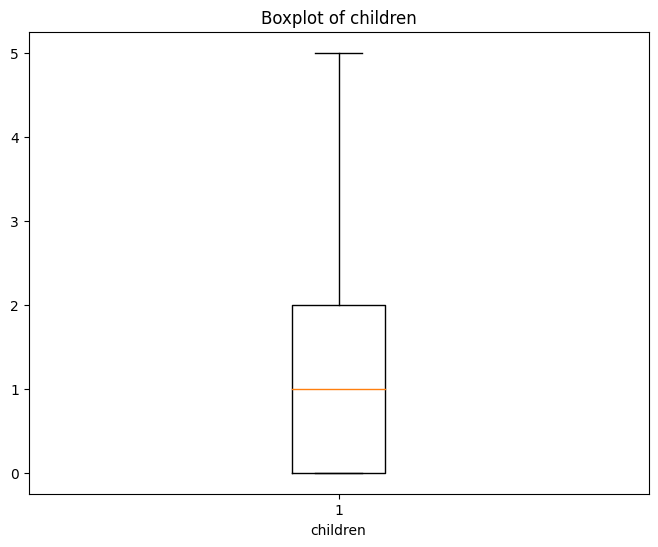

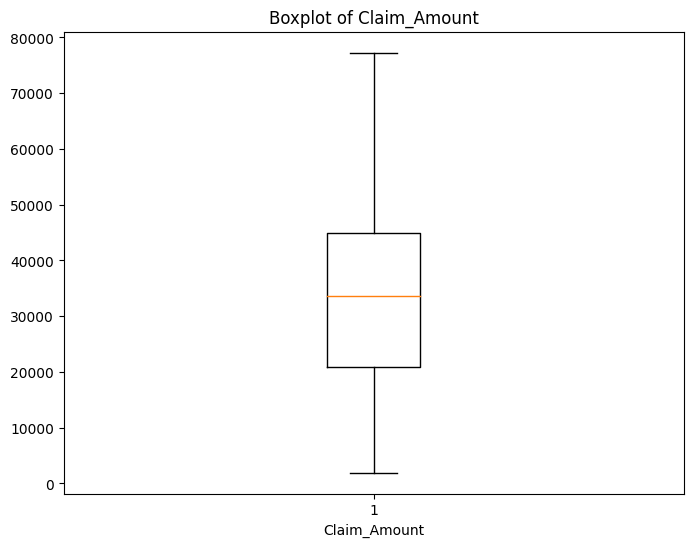

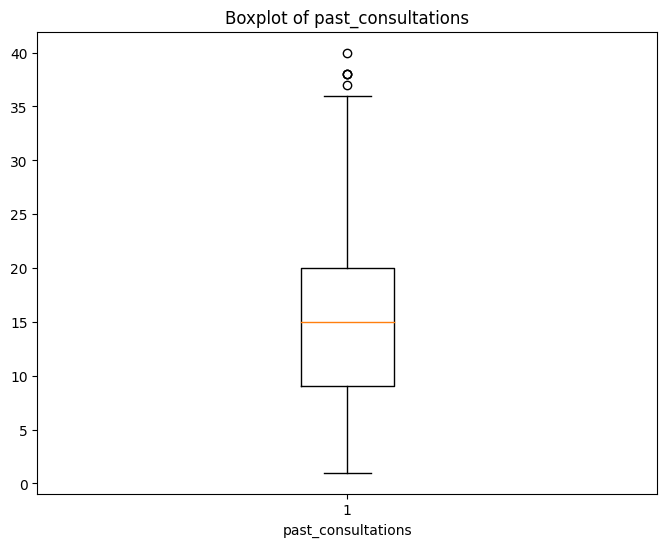

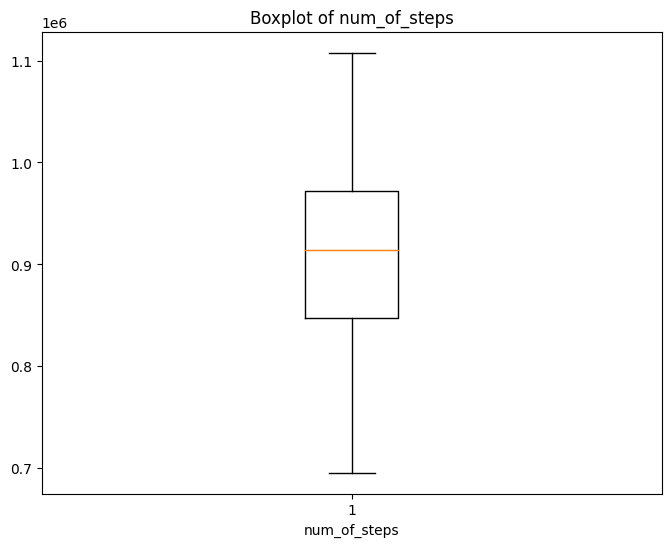

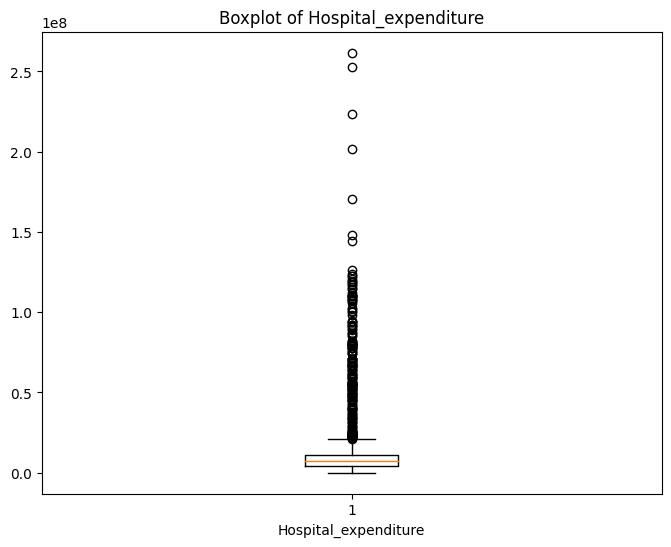

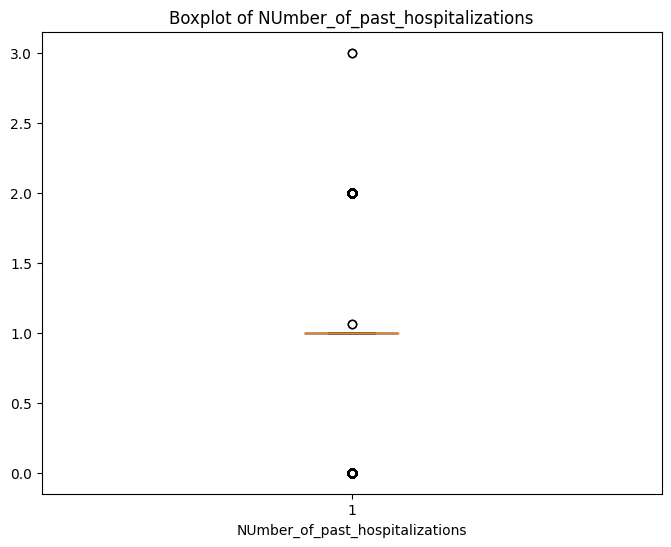

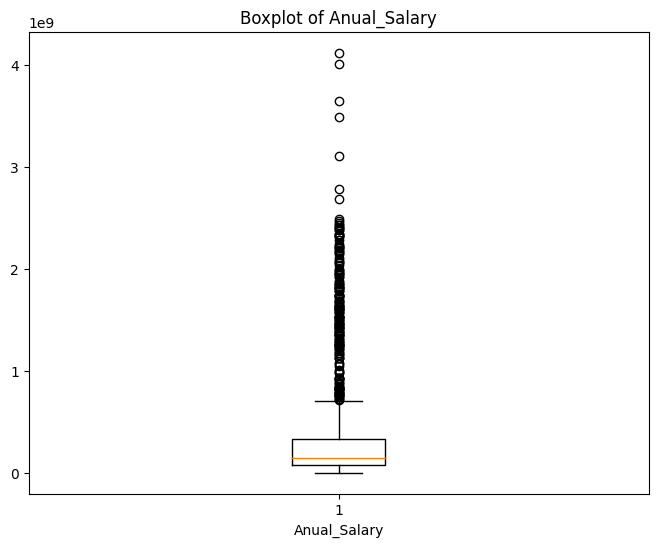

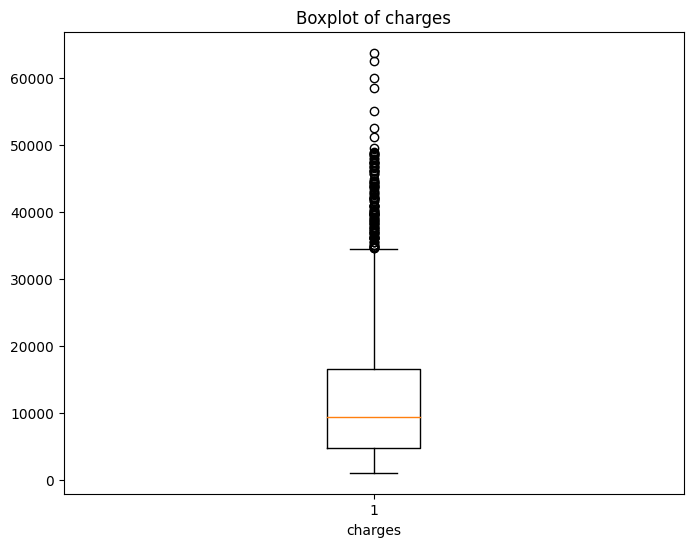

In [13]:
# Loop through the columns
for col_name in col:
    if insurance[col_name].dtypes == 'int64' or insurance[col_name].dtypes == 'float64':
        plt.figure(figsize=(8, 6))
        plt.boxplot(insurance[col_name])
        plt.title(f'Boxplot of {col_name}')
        plt.xlabel(col_name)
        plt.show()

There is presence of outliers in several columns, including 'bmi,' 'past_consultations,' 'Hospital_expenditure,' 'NUmber_of_past_hospitalizations,' 'Anual_Salary,' and 'charges.' These outliers may indicate exceptional cases or potential data quality issues

# Removing Outliers

In [14]:
Q1 = insurance.bmi.quantile(0.25)
Q3 = insurance.bmi.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.bmi >= Q1 - 1.5*IQR) & (insurance.bmi <= Q3 + 1.5*IQR)]

Q1 = insurance.past_consultations.quantile(0.25)
Q3 = insurance.past_consultations.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.past_consultations >= Q1 - 1.5*IQR) & (insurance.past_consultations <= Q3 + 1.5*IQR)]

Q1 = insurance.Hospital_expenditure.quantile(0.25)
Q3 = insurance.Hospital_expenditure.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.Hospital_expenditure >= Q1 - 1.5*IQR) & (insurance.Hospital_expenditure <= Q3 + 1.5*IQR)]

Q1 = insurance.Anual_Salary.quantile(0.25)
Q3 = insurance.Anual_Salary.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.Anual_Salary >= Q1 - 1.5*IQR) & (insurance.Anual_Salary <= Q3 + 1.5*IQR)]

In [15]:
insurance.shape

(1030, 13)

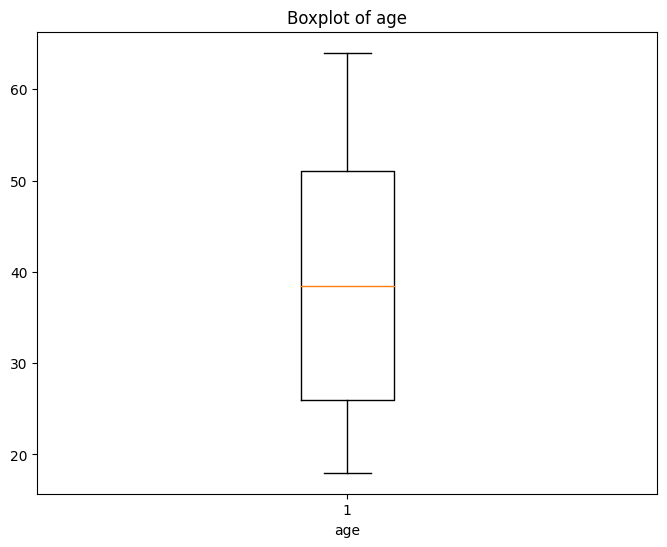

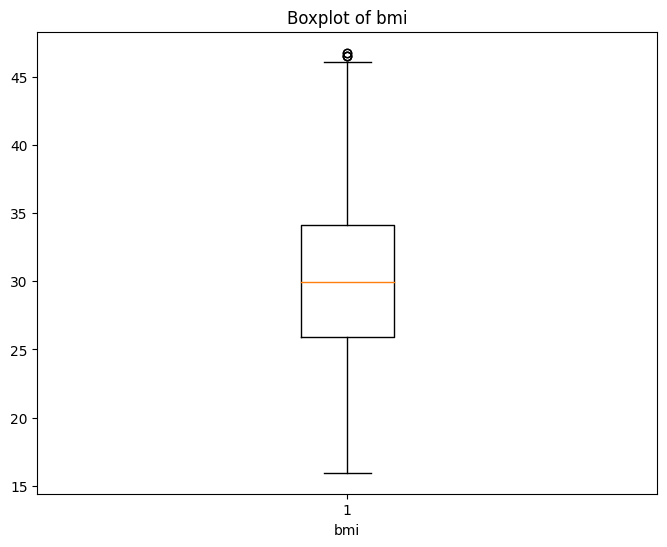

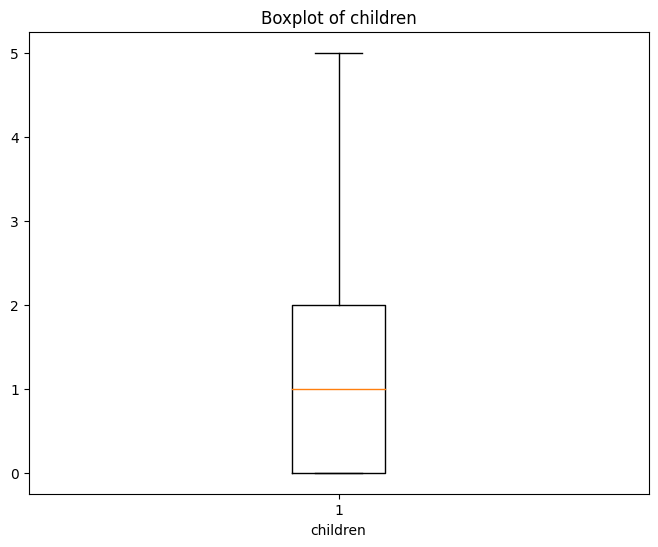

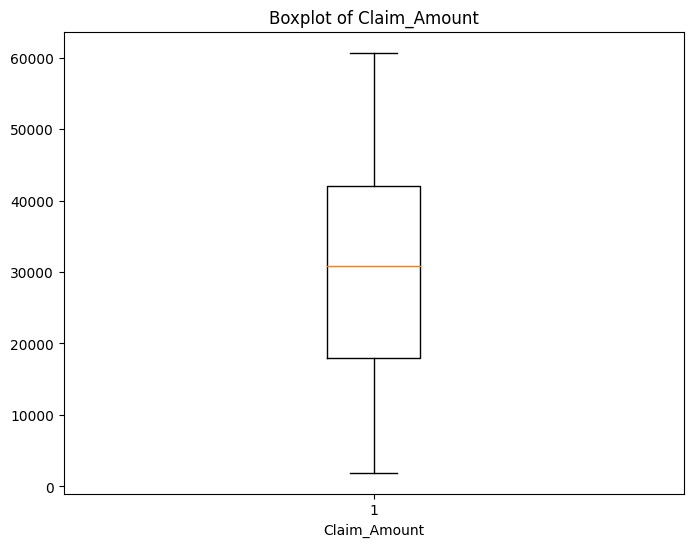

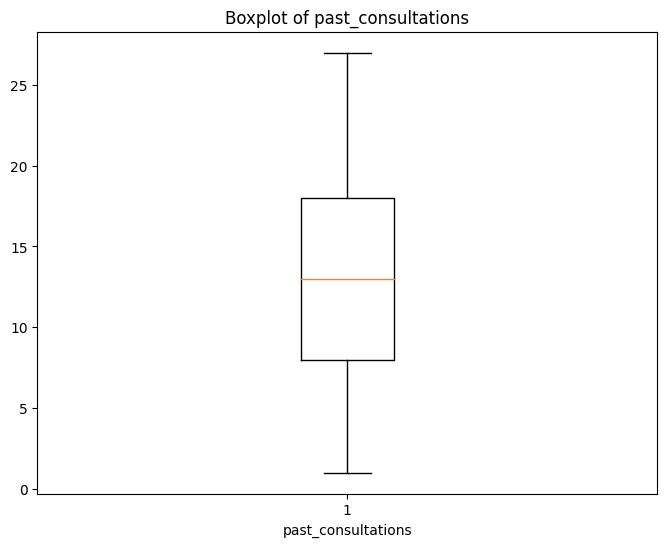

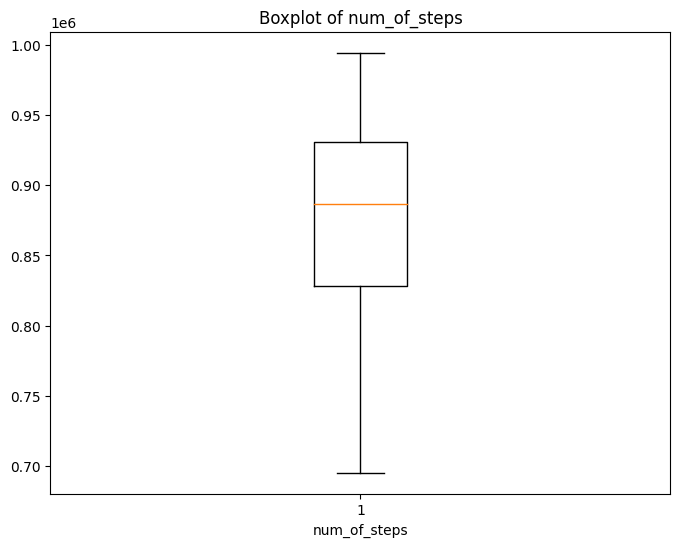

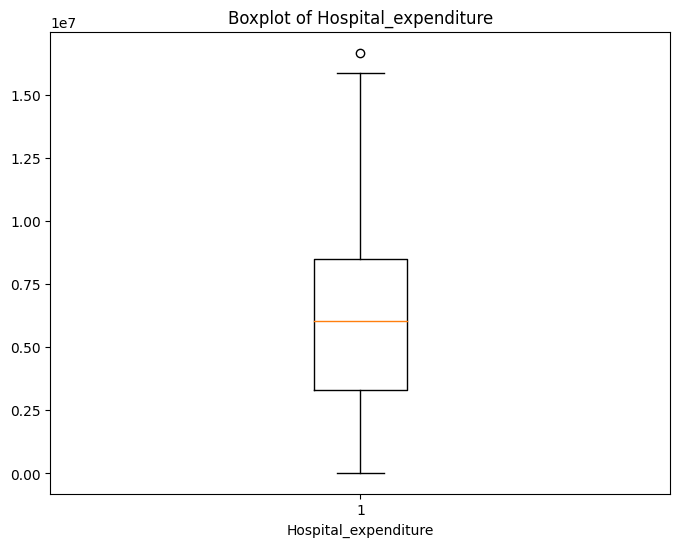

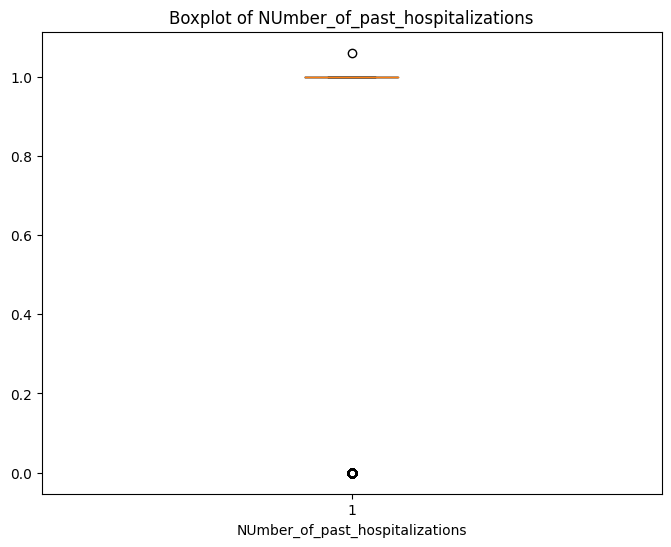

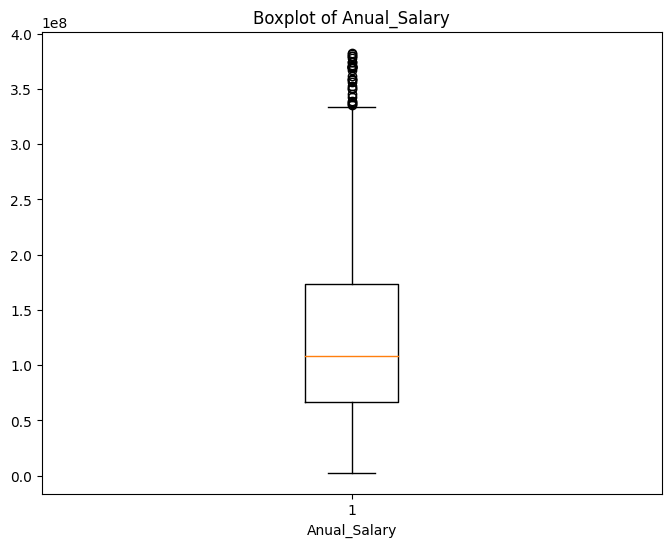

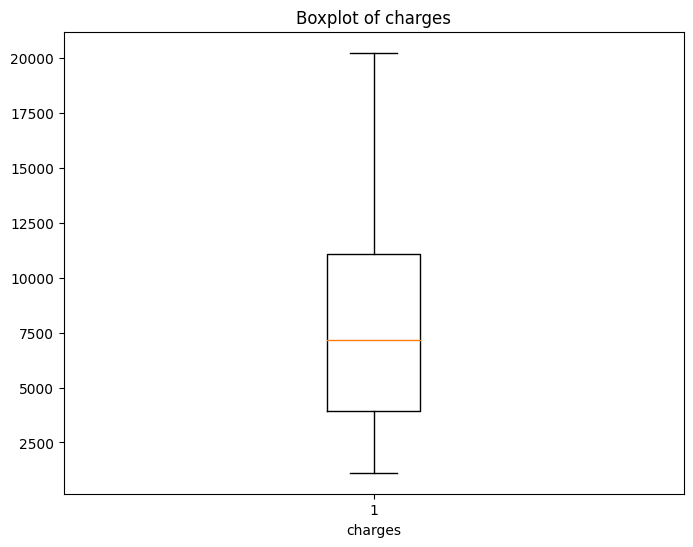

In [16]:
# Loop through the columns
for col_name in col:
    if insurance[col_name].dtypes == 'int64' or insurance[col_name].dtypes == 'float64':
        plt.figure(figsize=(8, 6))
        plt.boxplot(insurance[col_name])
        plt.title(f'Boxplot of {col_name}')
        plt.xlabel(col_name)
        plt.show()

# Feature Selection

In [17]:
insurance.corr()

<ipython-input-17-6dfb2156544f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insurance.corr()


,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.155957,0.045371,0.117750,0.172063,0.749468,0.160555,0.519538,0.490802,0.676071
bmi,0.155957,1.000000,0.006477,0.008343,0.023543,0.040324,0.013992,0.016121,0.004105,0.010248
children,0.045371,0.006477,1.000000,0.041716,0.045472,0.228830,-0.007494,0.316622,0.064840,0.138470
Claim_Amount,0.117750,0.008343,0.041716,1.000000,0.071569,0.185434,0.054111,0.109748,0.157826,0.192601
past_consultations,0.172063,0.023543,0.045472,0.071569,1.000000,0.259401,0.088466,0.135498,0.265710,0.278131
num_of_steps,0.749468,0.040324,0.228830,0.185434,0.259401,1.000000,0.299554,0.714983,0.767247,0.936946
Hospital_expenditure,0.160555,0.013992,-0.007494,0.054111,0.088466,0.299554,1.000000,0.129334,0.366809,0.358378
NUmber_of_past_hospitalizations,0.519538,0.016121,0.316622,0.109748,0.135498,0.714983,0.129334,1.000000,0.359422,0.538116
Anual_Salary,0.490802,0.004105,0.064840,0.157826,0.265710,0.767247,0.366809,0.359422,1.000000,0.892308
charges,0.676071,0.010248,0.138470,0.192601,0.278131,0.936946,0.358378,0.538116,0.892308,1.000000


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for col in insurance.columns:
    if (insurance[col].dtype != 'object') and (col != 'charges'):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                           feature        VIF
0                              age  15.452095
1                              bmi  26.330788
2                         children   2.029618
3                     Claim_Amount   5.678660
4               past_consultations   6.258017
5                     num_of_steps  61.574692
6             Hospital_expenditure   5.204376
7  NUmber_of_past_hospitalizations  12.052060
8                     Anual_Salary   5.481823


In [19]:
insurance = insurance.drop(['num_of_steps'], axis = 1)

In [20]:
# Recalculate VIF value

col_list = []
for col in insurance.columns:
    if (insurance[col].dtype != 'object') and (col != 'charges'):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                           feature        VIF
0                              age  14.484893
1                              bmi  12.261123
2                         children   2.017441
3                     Claim_Amount   5.243640
4               past_consultations   5.842169
5             Hospital_expenditure   4.929952
6  NUmber_of_past_hospitalizations  10.687768
7                     Anual_Salary   5.380679


In [21]:
insurance = insurance.drop(['age'], axis = 1)

In [22]:
# Recalculate VIF value

col_list = []
for col in insurance.columns:
    if (insurance[col].dtype != 'object') and (col != 'charges'):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                           feature        VIF
0                              bmi  10.323093
1                         children   1.978843
2                     Claim_Amount   5.228284
3               past_consultations   5.821933
4             Hospital_expenditure   4.929287
5  NUmber_of_past_hospitalizations   8.310570
6                     Anual_Salary   4.723495


In [23]:
insurance = insurance.drop(['bmi'], axis = 1)

In [24]:
# Recalculate VIF value

col_list = []
for col in insurance.columns:
    if (insurance[col].dtype != 'object') and (col != 'charges'):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                           feature       VIF
0                         children  1.977037
1                     Claim_Amount  4.547332
2               past_consultations  5.049165
3             Hospital_expenditure  4.492630
4  NUmber_of_past_hospitalizations  7.245972
5                     Anual_Salary  4.688833


In [25]:
insurance = insurance.drop(['NUmber_of_past_hospitalizations'], axis = 1)

In [26]:
# Recalculate VIF value

col_list = []
for col in insurance.columns:
    if (insurance[col].dtype != 'object') and (col != 'charges'):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                feature       VIF
0              children  1.713101
1          Claim_Amount  4.152224
2    past_consultations  4.670212
3  Hospital_expenditure  4.320876
4          Anual_Salary  4.279483


All columns have a VIF value < 6 . Thus we can stop the removal of dependent columns

In [27]:
x = insurance.loc[:, ['children', 'Claim_Amount', 'past_consultations', 'Hospital_expenditure', 'Anual_Salary']]
y = insurance.iloc[:, -1]

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Print the shapes of the training and testing sets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (824, 5)
X_test shape: (206, 5)
y_train shape: (824,)
y_test shape: (206,)


In [30]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [31]:
# Assuming you have already trained the linear regression model and made predictions (y_pred)
error_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows of the DataFrame
print(error_pred_df.head())

         Actual     Predicted
32    1629.8335   4828.900467
110   2155.6815   1666.580891
137   2396.0959   3989.607003
89    1981.5819   2978.443352
924  13430.2650  14711.192063


In [35]:
# Calculate the error (residual) as the difference between 'Actual' and 'Predicted'
error_pred_df['Error'] = error_pred_df['Actual'] - error_pred_df['Predicted']

# Display the 'error' DataFrame
print(error_pred_df)

         Actual     Predicted        Error
32    1629.8335   4828.900467 -3199.066967
110   2155.6815   1666.580891   489.100609
137   2396.0959   3989.607003 -1593.511103
89    1981.5819   2978.443352  -996.861452
924  13430.2650  14711.192063 -1280.927063
..          ...           ...          ...
484   6746.7425   6089.345694   657.396806
547   7537.1639   5736.956873  1800.207027
111   2156.7518   2581.571633  -424.819833
516   7162.0122   5336.678008  1825.334192
605   8515.7587   7487.761938  1027.996762

[206 rows x 3 columns]


In [36]:
from sklearn.metrics import r2_score

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared (R²) Score:", r2)


R-squared (R²) Score: 0.8536798102868128


An R-squared (R²) score of 0.8537 indicates that your linear regression model explains approximately 85.37% of the variance in the dependent variable (in this case, 'charges').

